# Workflow Start: EDA and Transformation of Target Outcome

The first step in the construction of our model is to set a target outcome for our model to predict. Due to the skew that was identified in our initial Exploratory Data Analysis for housing prices as a target outcome, a logarithmic transformation was performed to normalize the distribution and satisfy the linearity assumption needed for linear regression.

In [1]:
#package imports
import pandas as pd
import statsmodels as sm
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#Read in data file
df = pd.read_csv("./data/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
#selecting outcome and saving as a variable for further use
target = df["price"]

<AxesSubplot:xlabel='price', ylabel='Count'>

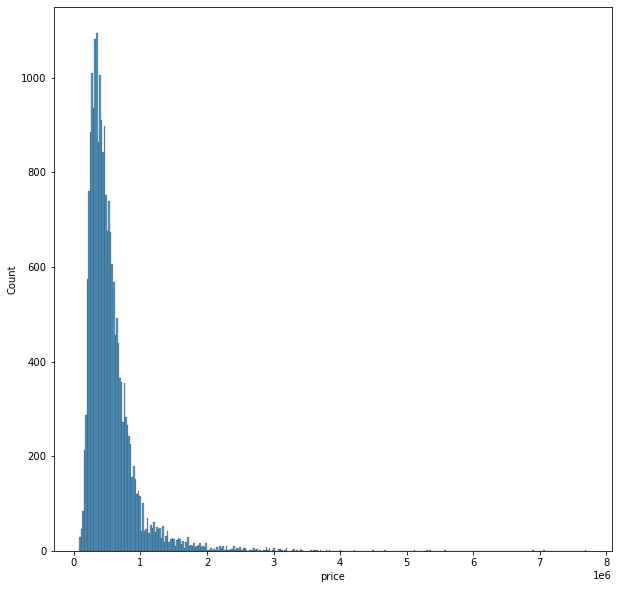

In [4]:
#visualize if price is normally distributed 
plt.subplots(figsize=(10,10))
sns.histplot(target)

In [5]:
#check if price is normally distributed 
target.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [6]:
#changed setting to display descriptive statistics without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)
target.describe()


count     21597.00
mean     540296.57
std      367368.14
min       78000.00
25%      322000.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64

In [7]:
#possible outliers
target.loc[target>= 6500000]


3910   7060000.00
7245   7700000.00
9245   6890000.00
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

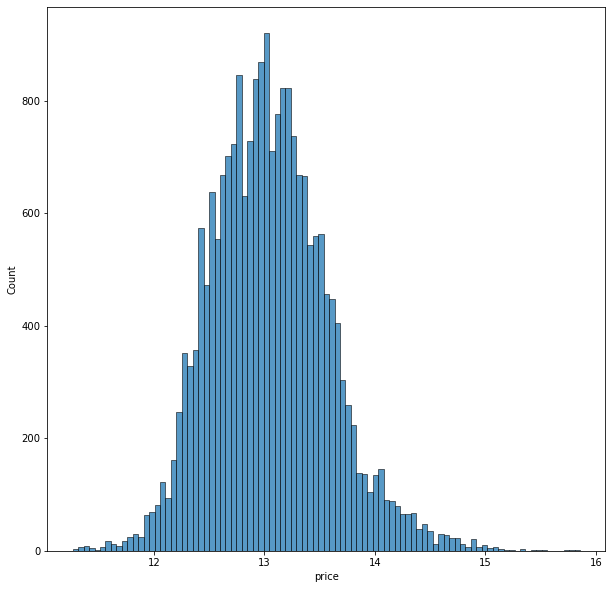

In [8]:
#Handle right-skew with log transform and reassess outlier impact on distribution
ln_target = np.log(target)
#visualize  
plt.subplots(figsize=(10,10))
sns.histplot(ln_target)

In [9]:
#check if price is normally distributed 
ln_target.describe()

count   21597.00
mean       13.05
std         0.53
min        11.26
25%        12.68
50%        13.02
75%        13.38
max        15.86
Name: price, dtype: float64

In [10]:
#skew is near zero - note the difference between median and mean in descriptive stats
#check kurtosis
stats.kurtosis(ln_target)

0.6906107356267648

In [11]:
#since fisher kurtosis score >=0, this distribution is very normal and we will accept this for our target outcome.
#Note that due to this transformation, the final model will be interpreted in terms of logarithm of price rather 
#than simple dollar amounts

#Save new target over old dataframe and rename new dataset
df["price"] = ln_target

#rename
final_df = df.rename(columns={"price":"ln_price"})

#test
final_df

,id,date,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,12.31,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,13.20,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,12.10,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,13.31,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,13.14,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,12.79,3,2.50,1530,1131,3.00,NO,NONE,...,8 Good,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2/23/2015,12.90,4,2.50,2310,5813,2.00,NO,NONE,...,8 Good,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,6/23/2014,12.90,2,0.75,1020,1350,2.00,NO,NONE,...,7 Average,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,1/16/2015,12.90,3,2.50,1600,2388,2.00,NaN,NONE,...,8 Good,1600,0.0,2004,0.00,98027,47.53,-122.07,1410,1287


In [12]:
#save new dataset as csv
final_df.to_csv("./data/ln_price_dataframe", index=False)
#proceed to further eda in further notebooks